## Raziskovanje bisekcije

Na prvih predavanjih smo videli nekaj algoritmov. No, dva spodobna in enega kar tako: linearno iskanje in bisekcijo, za zraven pa še naključno iskanje. Izvedeli smo, o čem bomo govorili, ko bomo govorili o časovni zahtevnosti algoritmov: o tem, kako narašča čas izvajanja (merjen v nekakšnih "operacijah", ne sekundah) narašča z velikostjo problema. Videli smo, da lahko narašča, na primer, linearno ali logaritemsko. Ker nas zanimajo le relativni časi, naključno iskanje ni nič slabše od linearnega (čeprav je dvakrat počasnejše), pa tudi najslabši možni primer je pogosto enak poprečnemu (če pri linearnem iskanju naletimo na iskani element na polovici poti ali pa imamo smolo in je iskani element vedno čisto na koncu, je to za nas eno in isto).

Tema prvega predavanja so bili torej algoritmi. Tema drugega bodo podatkovne strukture. Razlog, da se ta predmet (običajno, ne tule) imenuje "algoritmi in podatkovne strukture" je (ali pa bi lahko bil ;) v tem, da navadno želimo nekaj narediti (za kar potrebujemo algoritem), za to, da algoritem lahko deluje, pa je potrebno spraviti podatke v algoritmu primerno obliko (primerno podatkovno strukturo). Algoritem torej navadno narekuje podatkovno strukturo - in ne obratno.

Bežno smo se tega dotaknili na koncu prvih predavanj. Čeprav linearno iskanje in bisekcija na prvi pogled zahtevata enako podatkovno strukturo (seznam), to ni čisto res: linearno iskanje zahteva samo seznam, bisekcija pa hoče urejeni seznam. Urejeni seznami pa niso nujno tako poceni.

## Časovna zahtevnost bisekcije

Zanimivo je izračunati, kakšno je poprečno število primerjanj, ki jih zahteva bisekcija - ob predpostavki, da se ustavimo, če je srednji element pravi, sicer pa nadaljujemo iskanje levo ali desno od srednjega elementa, pri čemer srednji element izpustimo. Bisekcija ni vedno sprogramirana tako; če je srednji element vključen v, recimo, desno množico, je izračun nekoliko lažji, a zato manj zanimiv.

Stvari postavimo takole. Obstaja natančno en element, za katerega potrebujemo le eno primerjanje. Pač tisti na sredi. Če ta ni pravi, vprašamo po tistem, ki je na sredini desnega ali sredini levega dela. Torej imamo dva elementa, za katera potrebujemo dve primerjavi. Če tudi tadva nista prava, vprašamo po srednjem elementu v enem od štirih možnih intervalov. Torej imamo štiri elemente, za katere potrebujemo po tri primerjave.

| št. primerjav | št. elementov |
|--------------:|--------------:|
| 1             | 1             |
| 2             | 2             |
| 3             | 4             |
| 4             | 8             |
| 5             | 16            |
| ...           | ...           |
| $j$           | $2^{j-1}$     |

Vsota desnega stolpca je $1 + 2 + 4 + 8 + 16 + \ldots + 2^{j - 1} = 2^j - 1$ - če ne poznaš te vsote, jo izračunaj. (Namig: prenesi -1 z desne strani na levo, pa imaš 1 + 1 + 2 + 4 + 8 + 16 = 2 + 2 + 4 + 8 + 16 = 4 + 4 + 8 + 16 in tako naprej.)

Recimo, da imamo srečo in da je v seznamu, recimo, $n=31$ ali $n=63$ ali $n=127$ ... elementov. Se pravi toliko, da imamo "slučajno" ravno $n = 2^j - 1$. Kakšno je zdaj poprečno število primerjav? V $i$-ti vrstici imamo $i$ primerjav in $2^{i-1}$ elementov. Vseh elementov je $2^j - 1$. Torej je verjetnost, da se bomo znašli v $i$-ti vrstici, enaka $2^{i-1} / (2^j - 1)$. Da bi izračunali poprečno število primerjav, moramo prek vseh vrstic sešteti produkt števil primerjav in verjetnosti, da imamo toliko primerjav.

$$\sum_{i=0}^{j} i\; \frac{2^{i - 1}}{2^j - 1} = \frac{1}{2^j - 1} \sum_{i=0}^{j} i\; 2^{i - 1}$$

Vrsto seštevamo od 0 namesto od 1. Ker je vseeno ($i\;2^{i-1} = 0\;2^{-1} = 0$) in ker se vrste tako navadno lepše seštevajo.

Znamo sešteti tole vrsto? To je spet videti kot odvod. Z eno težavico. $i t^{i - 1}$ je res odvod $t^i$ po $t$. Ampak $i\; 2^{i - 1}$ je pa odvod $2^i$ po $2$?! Saj vendar ne moremo odvajati po konstanti! :) No, pa recimo $t=2$. Preprosto namesto 2 pišimo $t$.

$$\frac{1}{2^j - 1} \sum_{i=0}^{j} i\; t^{i - 1}
= \frac{1}{2^j - 1} \sum_{i=0}^{j} \frac{\partial t^i}{\partial t}
= \frac{1}{2^j - 1} \frac{\partial \sum_{i=0}^{j} t^i}{\partial t}
= \frac{1}{2^j - 1} \frac{\partial \frac{1 - t^{j+1}}{1 - t}}{\partial t}
= \frac{1}{2^j - 1} \left[\frac{(j + 1)t^j(t - 1) - (t^{j + 1} - 1)}{(t - 1)^2}\right]
$$

Zdaj pa se spomnimo, da je $t=2$, vse $t$-je zamenjajmo z 2 in mimogrede pozabimo na vse faktorje $t - 1$. Dobimo

$$\frac{1}{2^j - 1}\left[(j + 1)2^j - (2^{j + 1} - 1)\right] = \frac{(j - 1)2^j - 1}{2^j - 1}$$

$-1$ je v primerjavi z $2^j$ ništrc, torej je to toliko kot

$$\frac{(j - 1)2^j}{2 ^ j} = j - 1$$

V poprečju bomo torej potrebovali $j - 1$ primerjav. Spomnimo se, da imamo $n=2^j - 1$ elementov; če zanemarimo zanemarljivi $-1$, torej velja $j = \log_2 n$. Za bisekcijo v poprečju potrebujemo $j - 1 = \log_2 n - 1$ primerjav.

Ta izračun je prav poučen. Zaradi dveh stvari.

**Prva**: v poprečju potrebujemo $\log_2 n - 1$ primerjav v najslabšem primeru pa $\log_2 n$. Kar je skoraj enako. Če smo prejšnji teden rekli (točneje: če sem prejšnji teden rekel), da navadno računamo časovno zahtevnost v najslabšem primeru zato, ker jo je navadno lažje izračunati in je tako ali tako pogosto enaka poprečni - bi si lahko želeli še lepši primer?

**Druga**: Kako je lahko poprečje ravno en korak slabše od najslabšega? Kot vsako leto opazi vsaj en študent, še pogosteje pa študentka :), je večina -- skoraj polovica -- elementov je v zadnji vrstici. Zato tako zelo vplivajo na poprečje.

## Dodelana bisekcija

Preden nadaljujemo, bomo lepo sprogramirali bisekcijo. Pa nerekurzivna bo, tokrat.

Namesto, da bi programirali iskanje (tako, da imamo recimo seznam parov imen in telefonskih številk, pa damo bisekciji ime in nam vrne telefonsko številko) ali preverjanje, ali določen element obstaja (imamo abecedno urejen seznam imen in zanima nas, ali vsebuje določeno ime), bomo vračali indeks iskanega elementa.

In [1]:
def bisekcija(osebe, ime):
    od = 0  # indeks prvega kandidata
    do = len(osebe)  # indeks enega čez IN NE indeks zadnjega kandidata
    while od < do:
        sreda = (od + do) // 2
        if osebe[sreda] > ime:
            do = sreda
        else:
            od = sreda + 1
    return od

Najprej preskusimo na seznamu imen.

In [2]:
osebe = ["Ana", "Berta", "Cilka", "Dani", "Ema", "Fanči", "Greta", "Helga", 
         "Iva", "Jana", "Klara", "Liza", "Micka", "Nina", "Olga"]

In [3]:
bisekcija(osebe, "Jana")

10

Na hitro preverimo, ali je Jana res na 10. mestu.

In [4]:
osebe[10]

'Klara'

Ekhm.

In [5]:
osebe[bisekcija(osebe, "Nina")]

'Olga'

In [6]:
osebe[bisekcija(osebe, "Ana")]

'Berta'

Naša `bisekcija` ne deluje čisto: za `1` prevelik indeks vrača!

Ni bilo ponesreči. Še več, bilo je namerno. Zato: če imena ni, vrne indeks mesta, kjer bi bilo, če bi bilo. Oziroma, kamor ga vstaviti, če ga želimo vstaviti. Poglejte!

In [7]:
bisekcija(osebe, "Benjamin")

1

In [8]:
bisekcija(osebe, "Amelija")

0

In [9]:
bisekcija(osebe, "Katarina")

10

In [10]:
bisekcija(osebe, "Žorža")

15

In [11]:
len(osebe)

15

Vse je, kot mora biti. Če bi, recimo, vstavljali Katarino, bi morali napisati `osebe.insert(10, "Katarina")`.

## Merjenje časovne zahtevnosti

Merjenje časovne zahtevnosti bisekcije je nehvaležno delo, ker je tako hitra, da se bolj kot bisekcija sama poznajo drugi učinki - recimo to, kako deluje predpomnilnik procesorja, kaj v ozadju počne Python in podobno.

Vseeno poskusimo: sestavili bomo različno dolge sezname -- od sto tisoč do pet milijonov elementov, potem pa iskali tisoč naključno izbranih števil. Tudi seznam števil, ki jih iščemo, bomo pripravili vnaprej, da čas, ki ga Python sestavi za izmišljanje naključnega števila ne bi slučajno prevladal nad časom bisekcije (ali pa imel vse pomemben prispevek k njemu).

Za merjenje časa bomo uporabili razred `Stoparica`, ki je v modulu `stoparica` in je videti tako:

```python
from time import time

class Stoparica:
    def __init__(self):
        self.zacetek = time()

    def cas(self):
        return time() - self.zacetek
```

In [53]:
from random import random
from stoparica import Stoparica

N = 2 ** 60

dolzine = [100_000, 200_000, 500_000, 1_000_000, 2_000_000, 5_000_000]
casi = []
for n in dolzine:
    stevila = sorted(random() for _  in range(n))
    iscemo = [random() for _ in range(1000)]
    ura = Stoparica()
    for s in iscemo:
        bisekcija(stevila, s)
    casi.append(ura.cas() / 1000)

Narišimo rezultat - čas v odvisnosti od dolžine seznama.

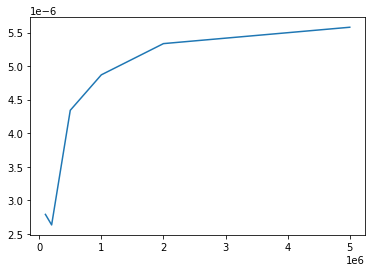

In [54]:
%matplotlib inline

from matplotlib.pyplot import plot

plot(dolzine, casi)

Ta slika je lahko bolj ali manj posrečena, krivulja bolj ali manj monotona. Kakor imamo srečo.

Primerjamo jo lahko z logaritmom. Če ne želimo komplicirati, pogledamo kar, kako bi tekla logaritemska krivulja, ki se konča v isti točki kot naša.

In [59]:
from math import log

casi_log = [log(x) * casi[-1] / log(dolzine[-1]) for x in dolzine]

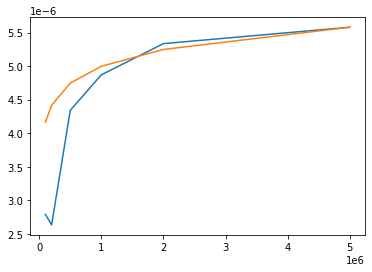

In [60]:
plot(dolzine, casi)
plot(dolzine, casi_log)

Krivulji sovpadata bolj ali pa manj, odvisno od sreče in kupa drugih dejavnikov. Skoraj gotovo pa se ta, ki kaže čas, najprej vzpenja hitreje, nato vedno počasneje - kot se mora, če naj bo vsaj približno logaritemska.

Primerjajmo še bisekcijo in linearno iskanje. Tega moramo najprej še sprogramirati.

In [61]:
def linearno(osebe, ime):
    for i, x in enumerate(osebe):
        if x > ime:
            return i
    return len(osebe)

Zdaj pa ju primerjajmo - a z bistveno krajšimi seznami, saj je linearno iskanje počasnejše in bi trajalo predolgo.

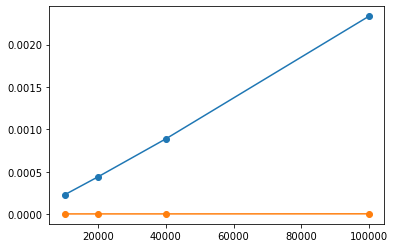

In [62]:
N = 2 ** 60

dolzine = [10000, 20000, 40000, 100000]
casi_bis = []
casi_lin = []
for n in dolzine:
    stevila = sorted(random() for _  in range(n))
    iscemo = [random() for _ in range(1000)]
    
    ura = Stoparica()
    for s in iscemo:
        bisekcija(stevila, s)
    casi_bis.append(ura.cas() / 1000)
    
    ura = Stoparica()
    for s in iscemo:
        linearno(stevila, s)
    casi_lin.append(ura.cas() / 1000)
    
plot(dolzine, casi_lin, "o-")
plot(dolzine, casi_bis, "o-")

## Se bisekcija res splača?

Ta je pa dobra. Če se splača? Saj smo videli graf: bisekcija ne vzame v primerjavi z linearnim iskanjem nič časa.

Če iščem besedo v slovarju (takšnem, iz prejšnjega stoletja, na papirju), bom slovar menda odprl nekje na sredi (ali, če gre za besedo na črko T, pač nekje bližje koncu) in potem bom z razpolavljanjem prišel do prave strani in na njej do prave besede. Nisem še srečal nikogar, ki bi besedo na črko T iskal tako, da bi listal po slovarju od začetka do T-ja. (To še ne pomeni, da takšni ljudje ne obstajajo. Le srečamo jih redko, ker nimajo časa, da bi hodili okrog.)

To je res. Vendar razmislimo o malo drugačni zgodbi.

Premešajmo in ponovno razdelimo listke z imeni. Vsakič, ko dobi nekdo listek, naj gre pred tablo.

Lahko Štefan zdaj išče Jano z bisekcijo? Aha! Ne, ker niso urejene!

No, naj se pa uredijo, ne? Saj, to je tisto. Morajo se urediti. Koliko časa nam vzame urejanje? O tem, se bomo še veliko pogovarjali. Izkaže se, da ... več kot linearno. Če podvojimo število elementov, se čas urejanja več kot podvoji. Če torej postavimo na tehtnico linearno iskanje, ki zahteva linearen čas in, na drugo stran, bisekcijo, ki sicer zahteva samo logaritemskega, vendar moramo zanjo seznam predtem urediti, kar zahteva čas, ki je hujši od linearnega ... potem se bisekcija ne splača in konec.

Hm, ne tako hitro. Bisekcije se res ne bi splačala, če bi Štefan iskal le Janino številko. Če ga danes zanima Jana, jutri pa Eva, je stvar drugačna. Urejamo enkrat za vselej. Če bomo naredili $m$ iskanj, bo čas pri linearnem iskanju sorazmeren $mn$, pri bisekciji pa $m\log_2 n + n\log n$ - $m\log_2 n$ za $m$ bisekcij, še prej pa $n\log n$ za urejanje $n$ elementov. (Uh, pravkar sem izdal časovno zahtevnost urejanja, $n\log n$. Nisem pa še razkril vseh kart v zvezi z njim, brez skrbi!) Če velja $m > \log n$, se pravi, če bo število iskanj ($m$) večje od logaritma števila elementov ($n$), je tudi $m\log_2 n + n\log n < mn$. No, to ni čisto res, a potrpite; o tem, kako se računa te stvari, se bomo še učili. Torej je kombinacija urejanja in bisekcije hitrejša od linearnega iskanja, čim vemo, da bomo potrebovali dovolj iskanj.

A to je šele pol problema. Bisekcija se je tule rešila, druga polovica pa bo usodnejša. Kaj se zgodi, če pride nova punca? I, kaj, postaviti se mora na mesto, ki ji pripada. Že, že, a najprej ga mora najti, ne? Prav: gre lepo po vrsti, dokler ne pride do tiste, pred katero bi morala stati in se postavi na to mesto.

In [66]:
def vstavi(s, x):
    i = linearno(s, x)
    s.insert(i, x)

Izmerimo, kako hitra je ta zadeva.

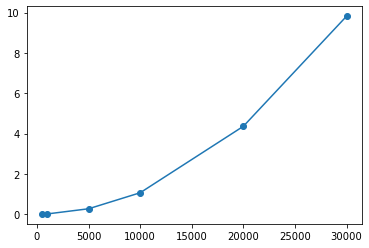

In [67]:
def vstavi_n_elementov(n):
    s = []
    for i in range(n):
        vstavi(s, random())
        
dolzine = [500, 1000, 5000, 10000, 20000, 30000]
casi = []
for dolzina in dolzine:
    t = Stoparica()
    vstavi_n_elementov(dolzina)
    casi.append(t.cas())

plot(dolzine, casi, "o-")

Je to ravna črta ali ne? Za to obstaja zelo prepričljiv preskus (vsaj na domačem računalniku je odlično deloval; v predavalnici se te reči tipično sfižijo). Predpostavili bomo, da gre za parabolo, ki ima teme v izhodišču (če vstavimo 0 elementov, to vzame 0 časa) in skozi zadnjo točko na gornji krivulji. Enačba te parabole bi bila $y = a x^2$, se pravi `casi[i] = a ** 2 * dolzine[i]`. Če pogledamo le zadnjo točko, mora (tudi) zanjo veljati `casi[-1] = a ** 2 * dolzine[-1]`. Ker čase in dolžine poznamo, lahko izračunamo `a = casi[-1] // dolzine[-1] ** 2`, potem pa narišemo krivuljo `a ** 2 * dolzine[i]` in pogledamo, kako se ujame s `casi[i]`.

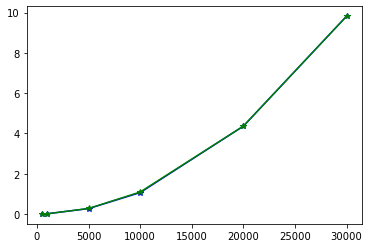

In [68]:
a = casi[-1] / dolzine[-1] ** 2
plot(dolzine, casi, "b*-")
plot(dolzine, [a * d ** 2 for d in dolzine], "g*-")

Parabola se popolnoma prilega izmerjenim časom!

Sicer pa to ni nič pričakovanega. Koliko časa bo naša funkcija v poprečju potrebovala, da sestavi seznam z $n$ elementi, je čisto lahko izračunati. Prejšnjič smo izračunali, za iskanje elementa v seznamu dolžine $n$ v poprečju potrebujemo $(n + 1) / 2$ operacij. Za iskanje njegovega mesta tudi. Ko vstavljamo $i$-ti element, je seznam dolg $i - 1$, torej bo iskanje vzelo $i / 2$ korakov. Za sestavljanje celotnega seznama z $n$ elementi bomo potrebovali $\sum_{i = 1}^n i / 2$ operacij, to pa je $n(n + 1)/4 = 1/4 n^2 + 1 / 4 n$. Torej parabola. Enačba ima sicer tudi linearni člen, vendar ta pravzaprav ni vreden omemben: že pri $n = 5000$ znaša kvadratni člen

In [69]:
1 / 4 * 5000 ** 2

6250000.0

linearni pa

In [70]:
1 / 4 * 5000

1250.0

Linearni člen je toliko vreden omembe, kolikor bi se pritoževali, če bi po tem, ko vam nekdo podari 6,25 milijona evrov, država zaračunala 1250 evrov davka. (Tole si zapomnite, ker nam bo prišlo še prav. Ne zaradi evrov, to naj vas ne skrbi, temveč, ker bo tale razlika med kvadratnimi in linearnimi členi nekoč postala pomembna.)

Znamo vstavljati hitreje? Seveda. Le mesto, kamor je potrebno vstaviti, poiščemo z bisekcijo namesto z linearnim iskanjem. (Mimogrede, da ne boste rekli, da goljufam: vse dolžine sem pomnožil z 10, ker je bisekcija toliko hitrejša, da si to lahko privoščim - in toliko hitrejša, da to pravzaprav moram storiti, da bodo moje meritve natančnejše.)

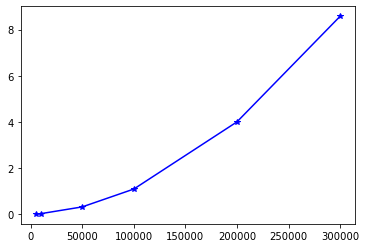

In [73]:
def vstavi(s, x):
    i = bisekcija(s, x)
    s.insert(i, x)
        
def vstavi_n_elementov(n):
    s = []
    for i in range(n):
        vstavi(s, random())
        
dolzine = [5000, 10000, 50000, 100000, 200000, 300000]
casi = []
for dolzina in dolzine:
    t = Stoparica()
    vstavi_n_elementov(dolzina)
    casi.append(t.cas())

%matplotlib inline
from pylab import plot

plot(dolzine, casi, "b*-")

Hm?!?! Je to ravna črta ali parabola?

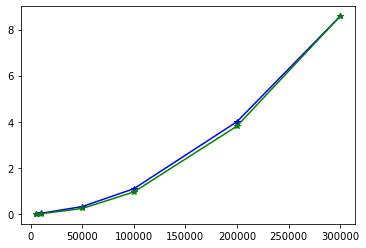

In [74]:
a = casi[-1] / dolzine[-1] ** 2
plot(dolzine, casi, "b*-")
plot(dolzine, [a * d ** 2 for d in dolzine], "g*-")

Huh?! Parabola?!?! Od bisekcije bi pričakovali kaj boljšega ne? Nima bisekcija logaritemske časovne zahtevnosti? Dvakrat večja tabela - za eno enoto večji čas?

Tole je vredno pomembnega novega razdelka.

## Skriti faktorji

Najprej: bisekcija že ima logaritemsko zahtevnost, vendar tule n-krat ponovimo bisekcijo. Če bi $n$-krat ponovili bisekcijo na seznamu dolžine $n$, bi bilo število operacij približno $n \ln n$.

No, v resnici bisekcijo najprej naredimo na seznamu dolžine 0 (ta korak bomo spregledali, saj je $\ln 0$ zoprna zadeva), nato na seznamu dolžine 1, dolžine 2 in tako naprej. Skupno število korakov bo torej $\sum_{i=1}^n \ln i$. Tega ne znam izračunati. Za silo pa znam integrirati in delal se bom, da je $\sum_{i=1}^n \ln i \approx \int_1^n \ln i \:di$.

$$\int_1^n \ln i\:di = \left[i \ln i - i\right]_1^n = n\ln n - n + 1$$

Pri oni pesimistični oceni, $n\ln n$ se torej niti nismo toliko ušteli. Tisti +1 je dokaj nepomemben, torej lahko vse skupaj zapišemo kot $n(\ln n - 1)$, pa tudi -1 je dokaj nepomemben v primerjavi z $\ln n$, če je le $n$ kolikor toliko velik. (Računalnikarji sicer pravijo, da za vsak $n$ velja, da je $\ln n$ manjši od 50.) Brez posebnega pesimizma smemo torej reči, da je časovna zahtevnost vstavljanja z bisekcijo enaka $n\ln n$.

Problem je samo v tem, da ... ni. Kakšno obliko ima funkcija $n\ln n$?

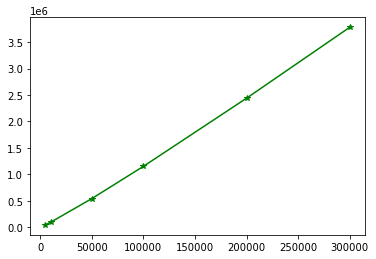

In [75]:
from math import log

plot(dolzine, [d * log(d) for d in dolzine], "g*-")

Funkcija $n\ln n$ je skoraj linearna, ker se $\ln n$ spreminja tako počasi. To, kar smo namerili zgoraj, pa ni linearno.

Odkod "kvadratnost" namerjene funkcije?

Funkcija `vstavi` kliče `bisekcijo` in `insert`. Če ni kriva `bisekcija` ... je kriv `insert`?

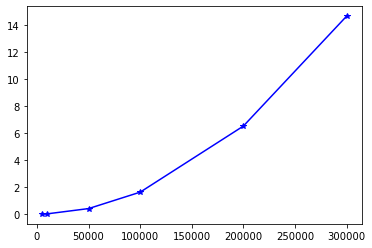

In [76]:
def vstavi_n_elementov(n):
    s = []
    for i in range(n):
        s.insert(0, 0)
        
dolzine = [5000, 10000, 50000, 100000, 200000, 300000]
casi = []
for dolzina in dolzine:
    t = Stoparica()
    vstavi_n_elementov(dolzina)
    casi.append(t.cas())

%matplotlib inline
from pylab import plot

plot(dolzine, casi, "b*-")

Tale program ničesar išče, si ni izmišljuje nobenih naključnih števil, temveč samo $n$-krat vstavi 0 na 0-to mesto seznama. In čas, ki ga potrebuje za vstavljanje, je spet kvadraten. Dobljene meritve se popolnoma prilegajo paraboli!

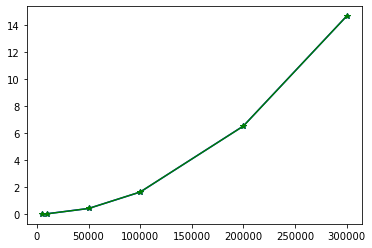

In [77]:
a = casi[-1] / dolzine[-1] ** 2
plot(dolzine, casi, "b*-")
plot(dolzine, [a * d ** 2 for d in dolzine], "g*-")

Še enkrat, da bomo prepričani, da vsi vemo, o čem govorimo: imamo zanko, ki $n$-krat ponovi insert. In čas, ki ga potrebuje za to, ni sorazmeren $n$-ju, temveč $n^2$. Težava je torej v metodi `insert`! Če bi ta potrebovala enak čas ne glede na dolžino seznama (ali, kot bi, ne preveč presenetljivo, rekli temu "namesto, da bi `insert` zahtevala *konstanten čas*), zahteva čas, ki je linearno odvisen od dolžine seznama. Le to lahko namreč razloži, zakaj $n$ ponovitev `insert`a zahteva čas sorazmeren $n\times n$.

Tale dokaz je bil nekoliko indirekten. Čas enega insert-a je tako kratek, da ga je težko izmeriti na tako grob način, kot merimo tu. Pač pa lahko naredimo še malo drugačen poskus, ki bo vrgel dodatno luč na to, kar smo pravkar odkrili. Namesto da dodajamo element na prvo mesto v seznamu, ga dodajajmo na konec. Zamenjajmo `s.insert(0, 0)` z `s.append(0)`

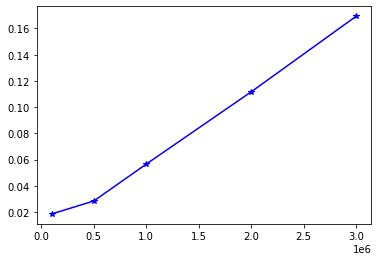

In [78]:
def vstavi_n_elementov(n):
    s = []
    for i in range(n):
        s.append(0)
        
dolzine = [100000, 500000, 1000000, 2000000, 3000000]
casi = []
for dolzina in dolzine:
    t = Stoparica()
    vstavi_n_elementov(dolzina)
    casi.append(t.cas())

%matplotlib inline
from pylab import plot

plot(dolzine, casi, "b*-")

Tule sem podeseteril vse dolžine, pa še vseeno izpustil prvo, saj je `append` tako hiter, da meritve sicer ne bi bile natančne. Tako pa vidimo: $n$ `append`ov zahteva linearen čas, torej je čas, ki ga zahteva `append` konstanten, neodvisen od dolžine seznama. Torej je `insert` iz nekega pač še neznanega razloga počasnejši od `append`a? Uh, niti ne. Vsaj ne nujno. Dodajajmo na konec, vendar z `insert`om.

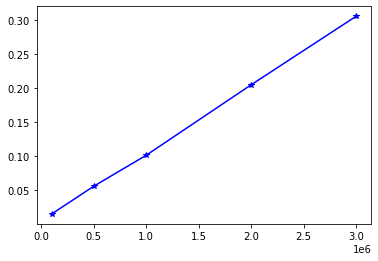

In [79]:
def vstavi_n_elementov(n):
    s = []
    for i in range(n):
        s.insert(len(s), 0)
        
dolzine = [100000, 500000, 1000000, 2000000, 3000000]
casi = []
for dolzina in dolzine:
    t = Stoparica()
    vstavi_n_elementov(dolzina)
    casi.append(t.cas())

%matplotlib inline
from pylab import plot

plot(dolzine, casi, "b*-")

Spet linearno?! Čas, ki ga potrebujemo za `s.insert(0, 0)` je linearno sorazmeren dolžini seznama, čas, ki ga potrebujemo za `s.insert(len(s), 0)` pa je enak ne glede na dolžino seznama.

Zdaj lahko najbrž uganemo, za kaj gre: ko vstavljamo v seznam, mora Python, točneje, metoda `insert`, premakniti vse elemente, ki so desno od mesta, na katerega vstavljamo, za en element v desno, da naredi prostor za novega. Če vstavljamo na začetek, mora premakniti vseh `len(s)` elementov. Če vstavljamo na konec, mu ni potrebno premakniti ničesar. V poprečju mora premakniti `len(s) / 2` elementov.

Koliko časa torej vzame vstavljanje, pri katerem smo mesto novega elementa določali z bisekcijo?

In [80]:
def vstavi(s, x):
    i = bisekcija(s, x, f)
    s.insert(i, x)

Funkcija je sestavljena iz dveh korakov. Prvi je bisekcija, katere zahtevnost je sorazmerna $\ln n$. Drugi je vstavljanje, katerega trajanje je sorazmerno $n$ (točneje, $n/2$, vendar je ta faktor nepomemben - dvakrat daljši seznam v vsakem primeru pomeni dvakrat daljši čas). Ker je $\ln n$ zanemarljiv proti $n$, bomo rekli, da je čas, ki ga potrebuje funkcija `vstavi` sorazmeren dolžini seznama. Z bisekcijo torej nismo pridobili ničesar: časovna zahtevnost je še vedno enaka, kot je bila, ko smo namesto `bisekcija` poklicali `linearno_iskanje`.

Kako je sprogramirana metoda `insert`? Metoda `insert` ni napisana v Pythonu, temveč v C-ju (ker je Python, vsaj različica, ki jo uporabljamo mi, napisana v C-ju). Vem, da ne govorite C-ja, vendar ga najbrž razumete vsej toliko kot Čeh bolgarščino, zato bom pokazal košček, ki je tule relevanten za nas:

`items` je seznam, v katerega vstavljamo, `v` je element, ki ga želimo vstaviti, `n` je dolžina seznama in `where` je mesto, kamor vstavljamo. Tale koda, prevedena v Python, bi bila takšna:

In [43]:
def insert(items, v, where):
    for i in range(n, where, -1):
        items[i + 1] = items[i]
    items[where] = v

Čas, ki ga potrebuje ta funkcija, je najočitneje sorazmeren razliki `n - where` - tolikokrat se mora namreč obrniti zanka, da prestavi vse elemente, ki jih je potrebno prestaviti. (Funkcija v tej obliki sicer ne deluje, ker nismo podaljšali seznama. Podaljševanje seznama nas tule ne zanima, saj bi zanj morali razumeti veliko več.)

(((Na tem mestu lahko poskusimo vajo, v kateri skupina sedi (urejeno) na stolih in se hoče nekdo nov usesti vmes. Na konec dodamo nov stol. "Sedci" so pasivni in naredijo, kar jim ta, ki vodi vse skupaj (računalnik...) reče.)))

### Pythonova zahrbtnost

Tule nas malo tepe, da uporabljamo Python. Kako naj vemo, kako je narejen `insert`? Odkod naj vemo, da je njegova zahtevnost linearna, zahtevnost `append`a pa konstantna? S tem bomo pač morali živeti. Občasno bom prepovedal uporabljati kakšno funkcijo; načelno bomo uporabljali le metode, ki imajo v Pythonu konstantno zahtevnost. Pri seznamih so varni le indeksiranje (brez rezin!), funkcija `len` ter metodi `append` in `clear`. Vse ostalo ima (lahko) linearno zahtevnost, `sort` pa še hujšo.

Po drugi strani pa se moramo zavedati še nečesa: Python je veliko počasnejši od C-ja. Rekli smo, da je funkcija vstavi sestavljena iz dveh korakov.

In [81]:
def vstavi(s, x):
    i = bisekcija(s, x, f)
    s.insert(i, x)

pri čemer je bisekcija takšna:

In [83]:
def bisekcija(s, x):
    od = 0
    do = len(s)
    while od < do:
        sreda = (od + do) // 2
        if f(s[sreda], x):
            do = sreda
        else:
            od = sreda + 1
    return od

in `insert` takšen:

Bisekcija ima, smo rekli, čas izvajanja sorazmeren logaritmu $n$, `insert` pa ima čas sorazmeren $n$, torej je, teoretično gledano bistveno počasnejši. Po drugi strani je bisekcija napisana v počasnem Pythonu, insert v hitrem C-ju. Da bi bilo tisto v Cju res počasnejše od Pythona, mora biti $n$ res velik. Kot sem pošteno povedal, sem pri bisekciji podeseteril velikosti seznamov. Drži, da je bilo to zaradi natančnosti merjenja. Po drugi strani pa bi pri manjših n-jih prišla do izraza (počasnost) bisekcije. Konkretno

$$t(\mbox{vstavi}) = t(\mbox{bisekcija}) + t(\mbox{insert}) \approx a \ln n + b n$$

$a$ in $b$ sem dopisal zato, da bom lahko rekel, da je Python, recimo, tisočkrat počasnejši od C-ja, torej imamo

$$1000 \times \ln n + 1 \times n$$

Če je $n$ dovolj velik, je $1000\ln n$ zanemarljiv proti $n$ in lahko rečemo $1000\ln n + n \approx n$. Če $n$ ni dovolj velik, pa bo prevladal prvi člen $1000\ln n$ in $1000\ln n + n \approx 1000\ln n$, kar je sorazmerno $\ln n$.